In [1]:
import pandas as pd 
import numpy as np 

In [2]:
train_data = pd.read_csv("bank-additional-full.csv", sep=";")
test_data = pd.read_csv("bank-additional.csv", sep=";")

In [3]:
train_data['y'].replace({"no":0, "yes":1}, inplace=True)
test_data['y'].replace({"no":0, "yes":1}, inplace=True)
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [4]:
# transform age to a categorical variable in the trainining data set 
train_data.loc[(train_data.age <=20), 'age_categories'] = 'young'  
train_data.loc[(train_data.age >20) & (train_data.age <=57), 'age_categories'] = 'adult'   
train_data.loc[(train_data.age >= 58), 'age_categories'] = 'old' 


In [5]:
# transform age to a categorical variable in the test data set 
test_data.loc[(test_data.age <=20), 'age_categories'] = 'young'  
test_data.loc[(test_data.age >20) & (test_data.age <=57), 'age_categories'] = 'adult'   
test_data.loc[(test_data.age >= 58), 'age_categories'] = 'old' 


In [6]:
#remove the numerical age variable 
train_data = train_data.drop('age', axis=1)
test_data = test_data.drop('age', axis=1)

In [7]:
train_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_categories
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,adult
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,adult
2,services,married,high.school,no,yes,no,telephone,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,adult
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,adult
4,services,married,high.school,no,no,yes,telephone,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,adult


In [8]:
train_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'age_categories'],
      dtype='object')

In [9]:
train_data.dtypes

job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
age_categories     object
dtype: object

In [10]:
X = train_data.drop('y', axis=1)
X.dtypes

job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
age_categories     object
dtype: object

In [11]:
from collections import Counter
print(sorted(Counter(train_data.y).items()))

[(0, 36548), (1, 4640)]


In [12]:
X.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'age_categories'],
      dtype='object')

### SMOTE 

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
from imblearn.over_sampling import SMOTENC

In [17]:
smote_nc = SMOTENC(categorical_features=[0,1,2,3,4,5,6,7,8,13,19], random_state=0, sampling_strategy=0.20)
X_resampled, y_resampled = smote_nc.fit_resample(X, train_data.y)

In [18]:
print(sorted(Counter(y_resampled).items()))

[(0, 36548), (1, 7309)]


In [19]:
X_resampled

array([['housemaid', 'married', 'basic.4y', ..., 4.857, 5191.0, 'adult'],
       ['services', 'married', 'high.school', ..., 4.857, 5191.0,
        'adult'],
       ['services', 'married', 'high.school', ..., 4.857, 5191.0,
        'adult'],
       ...,
       ['admin.', 'married', 'university.degree', ...,
        0.9139821330381106, 4963.6, 'adult'],
       ['admin.', 'married', 'high.school', ..., 0.7134125270472964,
        5019.404967543244, 'adult'],
       ['technician', 'single', 'high.school', ..., 1.2634653383934764,
        5076.2, 'adult']], dtype=object)

In [20]:
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
X_resampled.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_categories
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,adult
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,adult
2,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,adult
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,adult
4,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,adult


***

In [21]:
# turn categorical variables to dummy variables- TRAIN DATA

df1 = X_resampled

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','age_categories']
for var in cat_vars:
    cat_list = pd.get_dummies(df1[var], prefix=var)
    data1=df1.join(cat_list)
    df1 = data1

    

data_vars=df1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final_train = df1[to_keep]
data_final_train.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age_categories_adult,age_categories_old,age_categories_young
0,261,1,999,0,1.1,93.994,-36.4,4.857,5191,0,...,1,0,0,0,0,1,0,1,0,0
1,149,1,999,0,1.1,93.994,-36.4,4.857,5191,0,...,1,0,0,0,0,1,0,1,0,0
2,226,1,999,0,1.1,93.994,-36.4,4.857,5191,0,...,1,0,0,0,0,1,0,1,0,0
3,151,1,999,0,1.1,93.994,-36.4,4.857,5191,1,...,1,0,0,0,0,1,0,1,0,0
4,307,1,999,0,1.1,93.994,-36.4,4.857,5191,0,...,1,0,0,0,0,1,0,1,0,0


In [22]:
# CREATE DUMMY VARIABLES for the TEST SET 
df2 = test_data

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','age_categories']
for var in cat_vars:
    cat_list = pd.get_dummies(df2[var], prefix=var)
    data2=df2.join(cat_list)
    df2 = data2

    

data_vars=df2.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final_test = df2[to_keep]

data_final_test.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age_categories_adult,age_categories_old,age_categories_young
0,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,0,0,0,0,1,0,1,0,0
1,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,...,0,0,0,0,0,1,0,1,0,0
2,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,1,0,1,0,1,0,0
3,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,1,0,1,0,0
4,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,1,0,0,0,0,1,0,1,0,0


In [23]:
data_final_test.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age_categories_adult,age_categories_old,age_categories_young
0,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,0,0,0,0,1,0,1,0,0
1,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,...,0,0,0,0,0,1,0,1,0,0
2,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,1,0,1,0,1,0,0
3,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,1,0,1,0,0
4,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,1,0,0,0,0,1,0,1,0,0


***

### RFE

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
# RECURSIVE FEATURE ELIMINATION RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(data_final_train ,y_resampled)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False False False  True False False False  True
  True False False  True False False False False False False False False
 False False False False False False False False False  True False False
 False False False False  True  True False False  True False False False
 False  True  True  True  True False False False False False False  True
 False  True False False False]
[46 26 49  1 19 29 30  1 41 37 10  1  1  5 23  1  2  8 18 39 34 16  9 44
 47 25 22 21 35 50 13  7 45  1 11 51 27 14 28 36  1  1 31  3  1  4 48 12
 40  1  1  1  1 15 43  6 32 38 17  1 20  1 42 24 33]


In [41]:
important_features_idx =[]
for idx, rank in enumerate(rfe.ranking_):
    if rank==1:
        important_features_idx.append(idx)
        print("rank: {}".format(rank), "index: {}".format(idx))
print(important_features_idx)

rank: 1 index: 3
rank: 1 index: 7
rank: 1 index: 11
rank: 1 index: 12
rank: 1 index: 15
rank: 1 index: 33
rank: 1 index: 40
rank: 1 index: 41
rank: 1 index: 44
rank: 1 index: 49
rank: 1 index: 50
rank: 1 index: 51
rank: 1 index: 52
rank: 1 index: 59
rank: 1 index: 61
[3, 7, 11, 12, 15, 33, 40, 41, 44, 49, 50, 51, 52, 59, 61]


In [42]:
important_cols =[]
for idx in important_features_idx:
    important_cols.append(data_final_train.iloc[:,idx].name)
print(important_cols)

['previous', 'euribor3m', 'job_entrepreneur', 'job_housemaid', 'job_self-employed', 'default_no', 'loan_unknown', 'loan_yes', 'month_apr', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'poutcome_failure', 'poutcome_success']


***

In [43]:
#Implementing the model
import statsmodels.api as sm
X_train = sm.add_constant(data_final_train[important_cols])
logit_model=sm.Logit(y_resampled.astype(float),X_train.astype(float))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.352885
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                43857
Model:                          Logit   Df Residuals:                    43841
Method:                           MLE   Df Model:                           15
Date:                Thu, 26 Sep 2019   Pseudo R-squ.:                  0.2168
Time:                        17:41:27   Log-Likelihood:                -15476.
converged:                       True   LL-Null:                       -19759.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2738      0.066     -4.148      0.000      -0.403      -0.144
previous

In [44]:
# re fit after eliminating non-significant coefficients 
X_train = sm.add_constant(data_final_train[important_cols])
#X_train = X_train.drop(['housing_unknown', 'loan_unknown'], axis=1)
logit_model=sm.Logit(y_resampled.astype(float),X_train.astype(float))
result1=logit_model.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.352885
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                43857
Model:                          Logit   Df Residuals:                    43841
Method:                           MLE   Df Model:                           15
Date:                Thu, 26 Sep 2019   Pseudo R-squ.:                  0.2168
Time:                        17:42:04   Log-Likelihood:                -15476.
converged:                       True   LL-Null:                       -19759.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2738      0.066     -4.148      0.000      -0.403      -0.144
previous

In [45]:
# coefs conf intervals
result1.conf_int()

,0,1
const,-0.403156,-0.144415
previous,0.405565,0.597797
euribor3m,-0.514664,-0.475574
job_entrepreneur,-0.527424,-0.158510
job_housemaid,-0.693571,-0.241942
job_self-employed,-0.561235,-0.202035
default_no,0.536473,0.732856
loan_unknown,-0.725951,-0.279179
loan_yes,-0.538151,-0.356739
month_apr,-0.470399,-0.268905


In [46]:
# ODDS RATIO 
np.exp(result1.params)

const                0.760495
previous             1.651495
euribor3m            0.609498
job_entrepreneur     0.709662
job_housemaid        0.626406
job_self-employed    0.682744
default_no           1.886389
loan_unknown         0.604977
loan_yes             0.639259
month_apr            0.690974
month_mar            1.816081
month_may            0.375331
month_nov            0.664414
month_oct            1.510070
poutcome_failure     0.254115
poutcome_success     2.204910
dtype: float64

In [47]:
# odds ratios and 95% CI
params = result1.params
conf = result1.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                       2.5%     97.5%        OR
const              0.668208  0.865529  0.760495
previous           1.500150  1.818109  1.651495
euribor3m          0.597701  0.621528  0.609498
job_entrepreneur   0.590123  0.853414  0.709662
job_housemaid      0.499788  0.785101  0.626406
job_self-employed  0.570504  0.817067  0.682744
default_no         1.709966  2.081015  1.886389
loan_unknown       0.483864  0.756405  0.604977
loan_yes           0.583827  0.699955  0.639259
month_apr          0.624753  0.764216  0.690974
month_mar          1.525421  2.162124  1.816081
month_may          0.348061  0.404737  0.375331
month_nov          0.597402  0.738942  0.664414
month_oct          1.291362  1.765820  1.510070
poutcome_failure   0.217861  0.296402  0.254115
poutcome_success   1.843806  2.636735  2.204910


***

In [48]:
X_final = data_final_train[important_cols]
#.drop(['housing_unknown', 'loan_unknown'], axis=1)
y_final = y_resampled

In [81]:
X_final.previous = X_final.previous.astype(float)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_final, y_final)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
#Predicting the test set results and calculating the accuracy
X_test = data_final_test[important_cols]
X_test.previous = X_test.previous.astype(float)
#.drop(['housing_unknown', 'loan_unknown'], axis=1)
y_test = data_final_test['y']

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [84]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
(TN,FP,FN,TP) = confusion_matrix(y_test, y_pred).ravel()
print("TN:{}".format(TN), "FP:{}".format(FP), "FN:{}".format(FN), "TP:{}".format(TP))

TN:3586 FP:82 FN:328 TP:123


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3668
           1       0.60      0.27      0.37       451

    accuracy                           0.90      4119
   macro avg       0.76      0.63      0.66      4119
weighted avg       0.88      0.90      0.88      4119



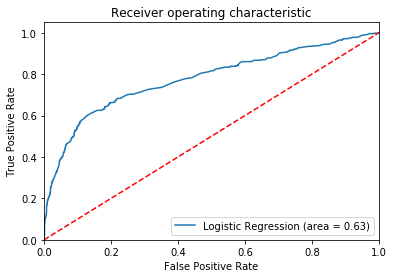

In [86]:
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = logreg.predict_proba(X_test)[:,1]

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

plt.figure()


plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [87]:
d = {'TPR': tpr, 'FPR': fpr, 'thresholds': thresholds}
DF = pd.DataFrame(data=d)
DF

,TPR,FPR,thresholds
0,0.000000,0.000000,1.975849
1,0.002217,0.000000,0.975849
2,0.011086,0.000000,0.942270
3,0.011086,0.000545,0.929237
4,0.015521,0.000545,0.918386
...,...,...,...
658,0.997783,0.995911,0.015487
659,0.997783,0.997001,0.015480
660,0.997783,0.999182,0.010310
661,1.000000,0.999455,0.010300


In [88]:
DF['thresholds'] = round(DF['thresholds'],3)
DF

,TPR,FPR,thresholds
0,0.000000,0.000000,1.976
1,0.002217,0.000000,0.976
2,0.011086,0.000000,0.942
3,0.011086,0.000545,0.929
4,0.015521,0.000545,0.918
...,...,...,...
658,0.997783,0.995911,0.015
659,0.997783,0.997001,0.015
660,0.997783,0.999182,0.010
661,1.000000,0.999455,0.010


In [89]:
DF = DF.sort_values('thresholds',ascending=True)
DF

,TPR,FPR,thresholds
662,1.000000,1.000000,0.010
661,1.000000,0.999455,0.010
660,0.997783,0.999182,0.010
659,0.997783,0.997001,0.015
658,0.997783,0.995911,0.015
...,...,...,...
4,0.015521,0.000545,0.918
3,0.011086,0.000545,0.929
2,0.011086,0.000000,0.942
1,0.002217,0.000000,0.976


In [90]:
TAP = len(y_test[y_test==1])
TAN = len(y_test[y_test==0])


In [91]:
DF['TAP'] = TAP
DF['TAN'] = TAN
DF

,TPR,FPR,thresholds,TAP,TAN
662,1.000000,1.000000,0.010,451,3668
661,1.000000,0.999455,0.010,451,3668
660,0.997783,0.999182,0.010,451,3668
659,0.997783,0.997001,0.015,451,3668
658,0.997783,0.995911,0.015,451,3668
...,...,...,...,...,...
4,0.015521,0.000545,0.918,451,3668
3,0.011086,0.000545,0.929,451,3668
2,0.011086,0.000000,0.942,451,3668
1,0.002217,0.000000,0.976,451,3668


In [92]:
DF['TP'] = DF['TPR'] * DF['TAP']
DF['TN'] = (1-DF['FPR']) * DF['TAN']
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN
662,1.000000,1.000000,0.010,451,3668,451.0,0.0
661,1.000000,0.999455,0.010,451,3668,451.0,2.0
660,0.997783,0.999182,0.010,451,3668,450.0,3.0
659,0.997783,0.997001,0.015,451,3668,450.0,11.0
658,0.997783,0.995911,0.015,451,3668,450.0,15.0
...,...,...,...,...,...,...,...
4,0.015521,0.000545,0.918,451,3668,7.0,3666.0
3,0.011086,0.000545,0.929,451,3668,5.0,3666.0
2,0.011086,0.000000,0.942,451,3668,5.0,3668.0
1,0.002217,0.000000,0.976,451,3668,1.0,3668.0


In [93]:
DF['FN'] = DF['TAP'] - DF['TP']
DF['FP'] = DF['TAN'] - DF['TN']
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP
662,1.000000,1.000000,0.010,451,3668,451.0,0.0,0.0,3668.0
661,1.000000,0.999455,0.010,451,3668,451.0,2.0,0.0,3666.0
660,0.997783,0.999182,0.010,451,3668,450.0,3.0,1.0,3665.0
659,0.997783,0.997001,0.015,451,3668,450.0,11.0,1.0,3657.0
658,0.997783,0.995911,0.015,451,3668,450.0,15.0,1.0,3653.0
...,...,...,...,...,...,...,...,...,...
4,0.015521,0.000545,0.918,451,3668,7.0,3666.0,444.0,2.0
3,0.011086,0.000545,0.929,451,3668,5.0,3666.0,446.0,2.0
2,0.011086,0.000000,0.942,451,3668,5.0,3668.0,446.0,0.0
1,0.002217,0.000000,0.976,451,3668,1.0,3668.0,450.0,0.0


In [94]:
DF['precision'] = DF['TP'] / (DF['TP'] +DF['FP'])
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision
662,1.000000,1.000000,0.010,451,3668,451.0,0.0,0.0,3668.0,0.109493
661,1.000000,0.999455,0.010,451,3668,451.0,2.0,0.0,3666.0,0.109546
660,0.997783,0.999182,0.010,451,3668,450.0,3.0,1.0,3665.0,0.109356
659,0.997783,0.997001,0.015,451,3668,450.0,11.0,1.0,3657.0,0.109569
658,0.997783,0.995911,0.015,451,3668,450.0,15.0,1.0,3653.0,0.109676
...,...,...,...,...,...,...,...,...,...,...
4,0.015521,0.000545,0.918,451,3668,7.0,3666.0,444.0,2.0,0.777778
3,0.011086,0.000545,0.929,451,3668,5.0,3666.0,446.0,2.0,0.714286
2,0.011086,0.000000,0.942,451,3668,5.0,3668.0,446.0,0.0,1.000000
1,0.002217,0.000000,0.976,451,3668,1.0,3668.0,450.0,0.0,1.000000


In [95]:
DF[(DF['thresholds']>0.4) & (DF['thresholds']<=0.55)]

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision
169,0.392461,0.051254,0.401,451,3668,177.0,3480.0,274.0,188.0,0.484932
168,0.392461,0.050436,0.401,451,3668,177.0,3483.0,274.0,185.0,0.488950
167,0.390244,0.049891,0.401,451,3668,176.0,3485.0,275.0,183.0,0.490251
166,0.390244,0.048800,0.401,451,3668,176.0,3489.0,275.0,179.0,0.495775
165,0.390244,0.047983,0.407,451,3668,176.0,3492.0,275.0,176.0,0.500000
...,...,...,...,...,...,...,...,...,...,...
90,0.230599,0.018539,0.527,451,3668,104.0,3600.0,347.0,68.0,0.604651
89,0.228381,0.018539,0.527,451,3668,103.0,3600.0,348.0,68.0,0.602339
88,0.228381,0.018266,0.534,451,3668,103.0,3601.0,348.0,67.0,0.605882
87,0.226164,0.018266,0.536,451,3668,102.0,3601.0,349.0,67.0,0.603550


In [96]:
DF.columns

Index(['TPR', 'FPR', 'thresholds', 'TAP', 'TAN', 'TP', 'TN', 'FN', 'FP',
       'precision'],
      dtype='object')

In [97]:
DF['specificity'] = 1-DF['FPR']
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity
662,1.000000,1.000000,0.010,451,3668,451.0,0.0,0.0,3668.0,0.109493,0.000000
661,1.000000,0.999455,0.010,451,3668,451.0,2.0,0.0,3666.0,0.109546,0.000545
660,0.997783,0.999182,0.010,451,3668,450.0,3.0,1.0,3665.0,0.109356,0.000818
659,0.997783,0.997001,0.015,451,3668,450.0,11.0,1.0,3657.0,0.109569,0.002999
658,0.997783,0.995911,0.015,451,3668,450.0,15.0,1.0,3653.0,0.109676,0.004089
...,...,...,...,...,...,...,...,...,...,...,...
4,0.015521,0.000545,0.918,451,3668,7.0,3666.0,444.0,2.0,0.777778,0.999455
3,0.011086,0.000545,0.929,451,3668,5.0,3666.0,446.0,2.0,0.714286,0.999455
2,0.011086,0.000000,0.942,451,3668,5.0,3668.0,446.0,0.0,1.000000,1.000000
1,0.002217,0.000000,0.976,451,3668,1.0,3668.0,450.0,0.0,1.000000,1.000000


In [98]:
DF[(DF['thresholds']>0.4) & (DF['thresholds']<=0.55)]

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity
169,0.392461,0.051254,0.401,451,3668,177.0,3480.0,274.0,188.0,0.484932,0.948746
168,0.392461,0.050436,0.401,451,3668,177.0,3483.0,274.0,185.0,0.488950,0.949564
167,0.390244,0.049891,0.401,451,3668,176.0,3485.0,275.0,183.0,0.490251,0.950109
166,0.390244,0.048800,0.401,451,3668,176.0,3489.0,275.0,179.0,0.495775,0.951200
165,0.390244,0.047983,0.407,451,3668,176.0,3492.0,275.0,176.0,0.500000,0.952017
...,...,...,...,...,...,...,...,...,...,...,...
90,0.230599,0.018539,0.527,451,3668,104.0,3600.0,347.0,68.0,0.604651,0.981461
89,0.228381,0.018539,0.527,451,3668,103.0,3600.0,348.0,68.0,0.602339,0.981461
88,0.228381,0.018266,0.534,451,3668,103.0,3601.0,348.0,67.0,0.605882,0.981734
87,0.226164,0.018266,0.536,451,3668,102.0,3601.0,349.0,67.0,0.603550,0.981734


In [99]:
DF['recall/sensitivity'] = DF['TPR']
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity,recall/sensitivity
662,1.000000,1.000000,0.010,451,3668,451.0,0.0,0.0,3668.0,0.109493,0.000000,1.000000
661,1.000000,0.999455,0.010,451,3668,451.0,2.0,0.0,3666.0,0.109546,0.000545,1.000000
660,0.997783,0.999182,0.010,451,3668,450.0,3.0,1.0,3665.0,0.109356,0.000818,0.997783
659,0.997783,0.997001,0.015,451,3668,450.0,11.0,1.0,3657.0,0.109569,0.002999,0.997783
658,0.997783,0.995911,0.015,451,3668,450.0,15.0,1.0,3653.0,0.109676,0.004089,0.997783
...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.015521,0.000545,0.918,451,3668,7.0,3666.0,444.0,2.0,0.777778,0.999455,0.015521
3,0.011086,0.000545,0.929,451,3668,5.0,3666.0,446.0,2.0,0.714286,0.999455,0.011086
2,0.011086,0.000000,0.942,451,3668,5.0,3668.0,446.0,0.0,1.000000,1.000000,0.011086
1,0.002217,0.000000,0.976,451,3668,1.0,3668.0,450.0,0.0,1.000000,1.000000,0.002217


In [100]:
DF[(DF['precision']>0.8)]

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity,recall/sensitivity
21,0.101996,0.002726,0.782,451,3668,46.0,3658.0,405.0,10.0,0.821429,0.997274,0.101996
20,0.099778,0.002726,0.783,451,3668,45.0,3658.0,406.0,10.0,0.818182,0.997274,0.099778
19,0.099778,0.002454,0.785,451,3668,45.0,3659.0,406.0,9.0,0.833333,0.997546,0.099778
18,0.095344,0.002454,0.787,451,3668,43.0,3659.0,408.0,9.0,0.826923,0.997546,0.095344
17,0.095344,0.002181,0.790,451,3668,43.0,3660.0,408.0,8.0,0.843137,0.997819,0.095344
16,0.084257,0.002181,0.821,451,3668,38.0,3660.0,413.0,8.0,0.826087,0.997819,0.084257
15,0.084257,0.001908,0.822,451,3668,38.0,3661.0,413.0,7.0,0.844444,0.998092,0.084257
14,0.077605,0.001908,0.844,451,3668,35.0,3661.0,416.0,7.0,0.833333,0.998092,0.077605
13,0.077605,0.001636,0.846,451,3668,35.0,3662.0,416.0,6.0,0.853659,0.998364,0.077605
12,0.075388,0.001636,0.846,451,3668,34.0,3662.0,417.0,6.0,0.850000,0.998364,0.075388


In [101]:
DF['F1_score'] = 2*((DF['precision']*DF['recall/sensitivity'])/(DF['precision']+DF['recall/sensitivity']))
DF

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity,recall/sensitivity,F1_score
662,1.000000,1.000000,0.010,451,3668,451.0,0.0,0.0,3668.0,0.109493,0.000000,1.000000,0.197374
661,1.000000,0.999455,0.010,451,3668,451.0,2.0,0.0,3666.0,0.109546,0.000545,1.000000,0.197461
660,0.997783,0.999182,0.010,451,3668,450.0,3.0,1.0,3665.0,0.109356,0.000818,0.997783,0.197109
659,0.997783,0.997001,0.015,451,3668,450.0,11.0,1.0,3657.0,0.109569,0.002999,0.997783,0.197455
658,0.997783,0.995911,0.015,451,3668,450.0,15.0,1.0,3653.0,0.109676,0.004089,0.997783,0.197628
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.015521,0.000545,0.918,451,3668,7.0,3666.0,444.0,2.0,0.777778,0.999455,0.015521,0.030435
3,0.011086,0.000545,0.929,451,3668,5.0,3666.0,446.0,2.0,0.714286,0.999455,0.011086,0.021834
2,0.011086,0.000000,0.942,451,3668,5.0,3668.0,446.0,0.0,1.000000,1.000000,0.011086,0.021930
1,0.002217,0.000000,0.976,451,3668,1.0,3668.0,450.0,0.0,1.000000,1.000000,0.002217,0.004425


In [102]:
DF[(DF['thresholds']>0.4) & (DF['thresholds']<=0.55)]

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity,recall/sensitivity,F1_score
169,0.392461,0.051254,0.401,451,3668,177.0,3480.0,274.0,188.0,0.484932,0.948746,0.392461,0.433824
168,0.392461,0.050436,0.401,451,3668,177.0,3483.0,274.0,185.0,0.488950,0.949564,0.392461,0.435424
167,0.390244,0.049891,0.401,451,3668,176.0,3485.0,275.0,183.0,0.490251,0.950109,0.390244,0.434568
166,0.390244,0.048800,0.401,451,3668,176.0,3489.0,275.0,179.0,0.495775,0.951200,0.390244,0.436725
165,0.390244,0.047983,0.407,451,3668,176.0,3492.0,275.0,176.0,0.500000,0.952017,0.390244,0.438356
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.230599,0.018539,0.527,451,3668,104.0,3600.0,347.0,68.0,0.604651,0.981461,0.230599,0.333868
89,0.228381,0.018539,0.527,451,3668,103.0,3600.0,348.0,68.0,0.602339,0.981461,0.228381,0.331190
88,0.228381,0.018266,0.534,451,3668,103.0,3601.0,348.0,67.0,0.605882,0.981734,0.228381,0.331723
87,0.226164,0.018266,0.536,451,3668,102.0,3601.0,349.0,67.0,0.603550,0.981734,0.226164,0.329032


In [103]:
DF.sort_values('F1_score', ascending=False)

,TPR,FPR,thresholds,TAP,TAN,TP,TN,FN,FP,precision,specificity,recall/sensitivity,F1_score
283,0.572062,0.108233,0.226,451,3668,258.0,3271.0,193.0,397.0,0.393893,0.891767,0.572062,0.466546
281,0.569845,0.107688,0.232,451,3668,257.0,3273.0,194.0,395.0,0.394172,0.892312,0.569845,0.466002
279,0.567627,0.106870,0.233,451,3668,256.0,3276.0,195.0,392.0,0.395062,0.893130,0.567627,0.465878
277,0.565410,0.106325,0.234,451,3668,255.0,3278.0,196.0,390.0,0.395349,0.893675,0.565410,0.465328
282,0.569845,0.108233,0.230,451,3668,257.0,3271.0,194.0,397.0,0.392966,0.891767,0.569845,0.465158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.015521,0.000818,0.909,451,3668,7.0,3665.0,444.0,3.0,0.700000,0.999182,0.015521,0.030369
2,0.011086,0.000000,0.942,451,3668,5.0,3668.0,446.0,0.0,1.000000,1.000000,0.011086,0.021930
3,0.011086,0.000545,0.929,451,3668,5.0,3666.0,446.0,2.0,0.714286,0.999455,0.011086,0.021834
1,0.002217,0.000000,0.976,451,3668,1.0,3668.0,450.0,0.0,1.000000,1.000000,0.002217,0.004425


***

In [108]:
X_final.previous.describe()

count    43857.000000
mean         0.192544
std          0.527646
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [104]:
print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                43857
Model:                          Logit   Df Residuals:                    43841
Method:                           MLE   Df Model:                           15
Date:                Thu, 26 Sep 2019   Pseudo R-squ.:                  0.2168
Time:                        19:12:28   Log-Likelihood:                -15476.
converged:                       True   LL-Null:                       -19759.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2738      0.066     -4.148      0.000      -0.403      -0.144
previous              0.5017      0.049     10.230      0.000       0.406       0.598
euribor3m            -0.

In [105]:
np.exp(result1.params)

const                0.760495
previous             1.651495
euribor3m            0.609498
job_entrepreneur     0.709662
job_housemaid        0.626406
job_self-employed    0.682744
default_no           1.886389
loan_unknown         0.604977
loan_yes             0.639259
month_apr            0.690974
month_mar            1.816081
month_may            0.375331
month_nov            0.664414
month_oct            1.510070
poutcome_failure     0.254115
poutcome_success     2.204910
dtype: float64

In [2]:
def logit(previous, euribor3m, job_entrepreneur, job_housemaid, job_self_employed, default_no, loan_unknown,
          loan_yes, month_apr, month_mar, month_may, month_nov, month_oct,
          poutcome_failure, poutcome_success):
    g = -0.2738 +(0.5017*previous) -(0.4951*euribor3m) -(0.3430*job_entrepreneur) -(0.4678* job_housemaid) - (0.3816*job_self_employed) + (0.6347*default_no) - (0.5026*loan_unknown) -(0.4474*loan_yes)- (0.3697*month_apr) +(0.5967*month_mar)-(0.9799*month_may) - (0.4088*month_nov) + (0.4122*month_oct) - (1.37*poutcome_failure) + (0.7907*poutcome_success)
    return g


In [8]:
logit(previous=1, euribor3m=1, job_entrepreneur=1, job_housemaid=0, job_self_employed=0, default_no=1, loan_unknown=0,
          loan_yes=1, month_apr=0, month_mar=1, month_may=0, month_nov=0, month_oct=0,
          poutcome_failure=0, poutcome_success=0)

0.17380000000000007

In [6]:
import numpy as np
def probability_subscription(g):
    probability = np.exp(g)/ (1+np.exp(g))
    return probability

In [9]:
probability_subscription(0.17380000000000007)

0.5433409568837609